### [2.5 балла] Задача 1
---

Известно, что брокер Вася списывает брокерскую комиссию по проведённым сделкам. Независимо от суммы сделки, его комиссия фиксирована. Недолго подумав, Вася пришёл к выводу, что рост числа сделок в день приводит к росту дневной выручки брокера. Бизнес-линия предложила новый функционал, который направлен на увеличение числа сделок с одной из ценных бумаг. Команде молодых аналитиков поручили проверить, является функционал эффективным или нет. Они поделили клиентов на две выборки -- экспериментальную и контрольную. Новый функционал тестировали на экспериментальной группе на протяжении 79 дней. Тем временем для контрольной группы введение нового функционала не было видно. Верно ли, что новый функционал увеличил среднее число сделок с ценной бумагой в день?

Ниже представлен набор данных -- число сделок с ценной бумагой в день в разрезе каждой из групп клиентов на протяжении 79 дней.

In [1]:
### Контрольная группа ###

control_group_list = [
    37, 22, 29, 29, 33, 22, 32, 36, 29,  6,  4, 37,  0, 36,  0, 32,
    27,  7, 19, 35, 26, 22, 28, 28, 32, 35, 28, 33, 35, 24, 21,  0,
    32, 28, 27,  8, 30, 37,  9, 33, 30, 36, 28,  3,  8, 31, 29,  9,
     0,  0, 35, 25, 29,  3, 33, 33, 28, 32, 39, 20, 32, 22, 24, 20,
    32,  7,  8, 33, 29,  9,  0, 30, 26, 25, 32, 38, 22, 29, 29
]

### Экспериментальная группа ###

experimental_group_list = [
    34, 27, 26, 33, 23, 37, 24, 34, 22, 23, 32,  5, 30, 35, 28, 25,
    37, 28, 26, 29, 22, 33, 31, 23, 37, 29,  0, 30, 34, 26, 28, 27,
    32, 29, 31, 33, 28, 21, 34, 29, 33,  6,  8, 29, 36,  7, 21, 30,
    28, 34, 28, 35, 30, 34,  9, 38,  9, 27, 25, 33,  9, 23, 32, 25,
    37, 28, 23, 26, 34, 32, 34, 0, 24,  30, 36, 28, 38, 35, 16
]

### Решение
---

#### **1. Обзор данных**

In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
c_group = np.array(control_group_list)
e_group = np.array(experimental_group_list)

In [4]:
### Ваш код ###
from scipy.stats import ttest_ind, levene

# Тест Левена на равенство дисперсий
levene_test = levene(c_group, e_group)

# T-тест на равенство средних
t_test_result = ttest_ind(c_group, e_group, equal_var=(levene_test.pvalue > 0.05))


print(f'[STATS] control:      size=\'{c_group.shape[0]}\', mean=\'{c_group.mean():.4f}\', std=\'{c_group.std():.4f}\'')
print(f'[STATS] experimental: size=\'{e_group.shape[0]}\', mean=\'{e_group.mean():.4f}\', std=\'{e_group.std():.4f}\'')

print(f"levene_test: {levene_test}")
print(f"t_test: {t_test_result}")

[STATS] control:      size='79', mean='23.8734', std='11.5236'
[STATS] experimental: size='79', mean='26.8987', std='8.8912'
levene_test: LeveneResult(statistic=3.8541545472823526, pvalue=0.05140110201691659)
t_test: TtestResult(statistic=-1.8357215595106697, pvalue=0.06830284207228175, df=156.0)


Тест Левена на равенство дисперсий показал p=0.0514. Этот результат находится на границе статистической значимости (обычно используют порог p < 0.05). Поэтому можно предположить, что дисперсии почти равны, но находятся на границе статистической значимости.

Тем не менее, для t-теста мы используем предположение о равенстве дисперсий.
T-тест на равенство средних показал p=0.0683. Это значение выше стандартного порога в p < 0.05 для определения статистической значимости. Следовательно, мы не можем отвергнуть нулевую гипотезу о равенстве средних чисел сделок в день между двумя группами. Это означает, что на уровне значимости 5% у нас нет достаточных оснований утверждать, что новый функционал увеличил среднее число сделок.

[]

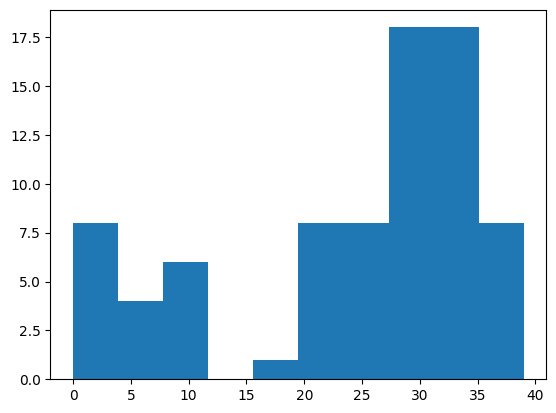

In [5]:
plt.hist(c_group)
plt.plot()

[]

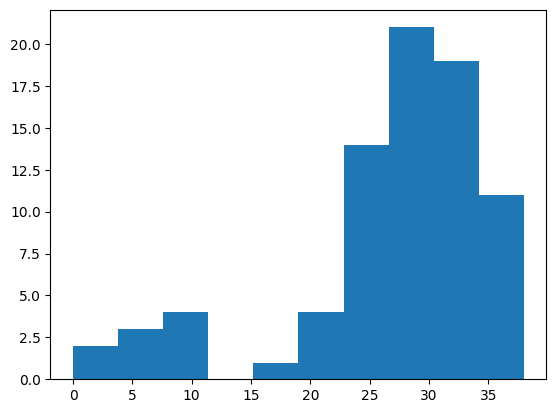

In [6]:
plt.hist(e_group)
plt.plot()

#### **2. Можно ли считать выборки нормальными?**

In [7]:
from scipy.stats import shapiro
from scipy.stats import probplot

ShapiroResult(statistic=0.8552354574203491, pvalue=2.7914961719943676e-07)

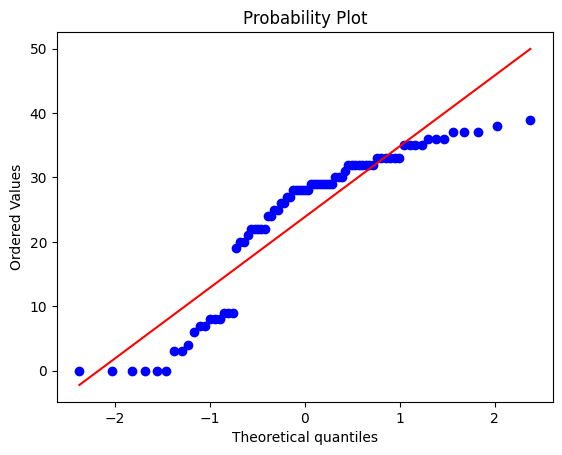

In [8]:
probplot(c_group, plot=plt)
shapiro(c_group)

ShapiroResult(statistic=0.8490069508552551, pvalue=1.722243609947327e-07)

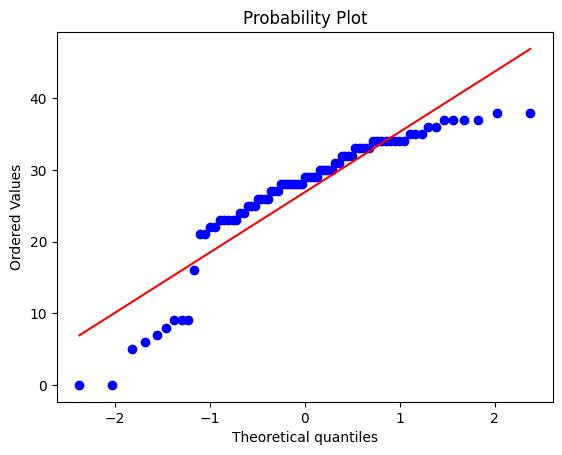

In [9]:
probplot(e_group, plot=plt)
shapiro(e_group)

**Ваш ответ (да/нет и почему)**

В обоих случаях p-значения намного меньше 0.05, что позволяет нам отвергнуть нулевую гипотезу о нормальности распределения данных в каждой группе. Это означает, что данные в обеих группах не следуют нормальному распределению.

Итого ответ: **нет**

#### **3. Предварительные обсуждения**

Заметим, что размеры выборок > 40, поэтому можно использовать асимптотические приближения для статистик из z- и t- критериев.

Из интересного: при достаточно больших $n$ результаты z- и t- критериев почти неотличимы

#### **4. Формализация задачи**

Пусть $\mu_C$ -- среднее для контрольной группы, $\mu_E$ -- среднее для экспериментальной группы. Тогда

- $H_0 : \mu_C = \mu_E$
- $H_1 : \mu_C < \mu_E$
- $\alpha = 0.05$

#### **5. Численное решение**

In [7]:
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ttest_ind

In [8]:
alpha = 0.05

In [ ]:
# Ниже введены обозначения

#    stat -- значение статистики
# p_value -- значение p_value

In [9]:
z_test = ztest(x1=c_group, x2=e_group, value=0, alternative='smaller')

print(f'[Z_TEST] stat=\'{z_test[0]:.4f}\', p_value=\'{z_test[1]:.4f}\'')
print(f'[Z_TEST] p_value < alpha : {z_test[1] < alpha}')

[Z_TEST] stat='-1.8357', p_value='0.0332'
[Z_TEST] p_value < alpha : True


In [11]:
t_test = ttest_ind(x1=c_group, x2=e_group,)

print(f'[T_TEST] stat=\'{t_test[0]:.4f}\', p_value=\'{t_test[1]:.4f}\', df=\'{t_test[2]}\'')
print(f'[T_TEST] p_value < alpha : {t_test[1] < alpha}')

[T_TEST] stat='-1.8357', p_value='0.0683', df='156.0'
[T_TEST] p_value < alpha : False


#### **6. Выводы**

Является ли новый функционал эффективным? Т.е. увеличил ли он среднее число сделок в день?

**Ваш ответ**:

Так как p-значение больше альфа (0.05), мы не можем отвергнуть нулевую гипотезу о том, что различия между средними в группах статистически не значимы. Это означает, что по результатам t-теста у нас нет достаточных оснований считать, что новый функционал увеличил количество сделок.
Новый функционал не показал эффективности в увеличении количества сделок в экспериментальной группе, основываясь на результатах t-теста.

### [2.5 балла] Задача 2
---

Представим себе, что в компании "Рога и Копыта" есть собственное приложение, которое обрабатывает входящие сообщения и сохраняет их в базу. "Рога и Копыта" уже довольно давно на рынке, и у них построена собственная многопоточная пропускная система. С недавним приростом клиентов в компании наблюдается нагрузка на обработчик событий. Поэтому команде бэкэнд-разработки было поручено усовершенствовать процесс. Они решили добавить в многопоточную систему ещё один поток, который мог бы сильнее распараллелить процесс. Завтра команда бэкэнд-разработки должна представить отчёт руководству, в котором будет отражено, удалось ли им снизить среднюю нагрузку событий в разрезе одного потока. В силу ограниченности сроков у команды есть замеры пропускной системы только за 10 и 8 дней (до и после вывода функционала). Помогите ребятам проверить гипотезу о том, что процесс удалось усовершенствовать.

Ниже представлен набор данных -- среднее число (тыс.) событий в день в расчете на один поток до и после вывода нового потока в эксплуатацию.

In [13]:
### 10 дней до вывода в эксплуатацию ###

X_list = [
    2748, 2700, 2655, 2822, 2511, 3149, 3257, 3213, 3220, 2753
]

### 8 дней после вывода в эксплуатацию ###

Y_list = [
    3027, 3356, 3359, 3297, 3125, 2910, 2889, 2902
]

### Литература

- [t-критерий Уэлча](https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A3%D1%8D%D0%BB%D1%87%D0%B0#:~:text=t%2D%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9%20%D0%A3%D1%8D%D0%BB%D1%87%D0%B0%20%E2%80%94%20%D1%82%D0%B5%D1%81%D1%82%2C,%D0%B8%D0%BC%D0%B5%D1%8E%D1%89%D0%B8%D1%85%20%D0%BD%D0%B5%D0%BE%D0%B1%D1%8F%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%20%D1%80%D0%B0%D0%B2%D0%BD%D1%8B%D0%B5%20%D0%B8%D0%B7%D0%B2%D0%B5%D1%81%D1%82%D0%BD%D1%8B%D0%B5%20%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%B8.) -- описание критерия на вики
- [Modern Mathematical Statistics with Applications](http://www.springer.com/series/417) -- описание критерия в книге, гл. 10, раздел 10.2

### Решение
---

#### **1. Обзор данных**

In [14]:
X = np.array(X_list)
Y = np.array(Y_list)

In [18]:
### Ваш код ###

print(f'[STATS] before: size=\'{X.shape[0]}\', mean=\'{X.mean():.4f}\', std=\'{X.std():.4f}\'')
print(f'[STATS] after:  size=\'{Y.shape[0]}\', mean=\'{Y.mean():.4f}\', std=\'{Y.std():.4f}\'')

# Тест Левена на равенство дисперсий
levene_test = levene(X, Y)

# T-тест на равенство средних (с учетом возможного различия дисперсий)
t_test_result = ttest_ind(X, Y)

print(f"levene_test: {levene_test}")
print(f"t_test: {t_test_result}")

[STATS] before: size='10', mean='2902.8000', std='263.0368'
[STATS] after:  size='8', mean='3108.1250', std='192.5736'
levene_test: LeveneResult(statistic=0.5679674509656688, pvalue=0.4620148499421961)
t_test: (-1.7414417115314245, 0.10079527160117663, 16.0)


#### **2. Можно ли считать выборки нормальными?**

ShapiroResult(statistic=0.869951605796814, pvalue=0.09983596950769424)

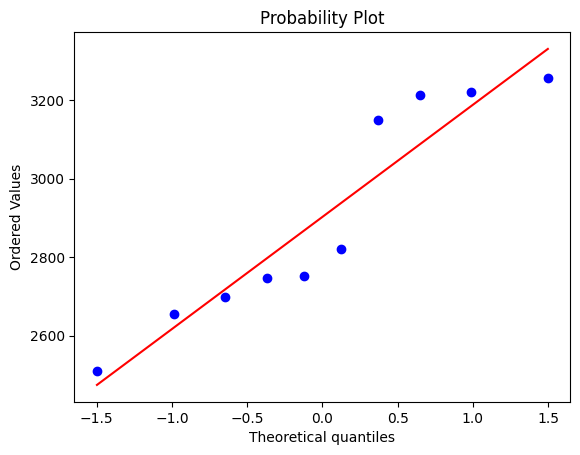

In [21]:
from scipy.stats import probplot, shapiro
probplot(X, plot=plt)
shapiro(X)

ShapiroResult(statistic=0.8469980359077454, pvalue=0.0888126939535141)

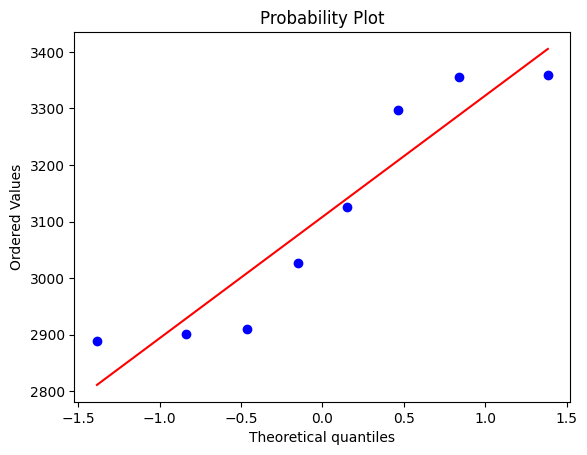

In [22]:
probplot(Y, plot=plt)
shapiro(Y)

**Ваш ответ (да/нет и почему)**

В обоих случаях p-значения выше общепринятого порога в 0.05. Это означает, что нет оснований отвергнуть нулевую гипотезу о нормальности распределения данных в каждой из выборок.

Итого ответ: **да**

#### **3. Предварительные обсуждения**

1. Можно ли предположить, что выборки являются нормальными?
    - да
2. Известна ли дисперсия?
    - нет
3. На основании двух пунктов выше выберем критерий
    - t_test
4. Не забываем, что равенства дисперсий нет (по крайней мере об этом нигде не написано)

#### **4. Формализация задачи**

Пусть $\mu_X$ -- средняя нагрузка на поток до вывода новой фичи, $\mu_Y$ -- средняя нагрузка на поток после вывода новой фичи. Тогда

- $H_0$ : $\mu_X$ = $\mu_Y$

- $H_1$ : $\mu_X$ < $\mu_Y$

- $\alpha = 0.05$

#### **5. Численное решение**

Hint: _Нужно не забыть, что дисперсии не равны. Для этого не забудьте параметр_ `usevar='unequal'`

In [23]:
alpha = 0.05

In [24]:
t_test = ttest_ind(x1=X, x2=Y, usevar='unequal')

print(f'[T_TEST] stat=\'{t_test[0]:.4f}\', p_value=\'{t_test[1]:.4f}\', df=\'{t_test[2]}\'')
print(f'[T_TEST] p_value < alpha : {t_test[1] < alpha}')

[T_TEST] stat='-1.8018', p_value='0.0905', df='15.943548718750007'
[T_TEST] p_value < alpha : False


#### **6. Выводы**

Улучшил ли новый поток показатель нагрузки "среднее число событий на поток"?

**Ваш ответ**:

Так как p-значение (0.0905) больше альфа (0.05), мы не можем отвергнуть нулевую гипотезу о том, что различия между средними в группах статистически не значимы. Это означает, что по результатам t-теста у нас нет достаточных оснований считать, что новый поток улучшил показатель нагрузки. Новый поток не показал эффективности в увеличении количества сделок в группе после, основываясь на результатах t-теста.

### [2.5 балла] Задача 3
---

В базе данных одной из риэлторских компаний есть информация о продажной стоимости недвижимости в Seatle для 41 сделки в 2021 и 2022 годах. Можно ли утверждать, что цены на недвижимость изменились?

In [25]:
### Данные за 2021 год ###

A_list = [
    419, 210, 212.2, 152.72, 266.6, 69.427,
    125, 191, 451, 469, 310, 325, 140,
    105.5, 285, 320, 305, 255, 95.179, 346, 199, 450,
    280, 205.5, 135, 190, 335, 455, 291.905, 239.9,
    369.95, 481, 475, 195, 237.5, 143, 218.95,
    239, 172, 228.5, 270
]

### Данные за 2022 год ###

B_list = [
    142, 232, 132.5, 200, 362, 244.95, 335, 324.5,
    222, 225, 175, 215, 260, 307, 210.95,
    215.5, 179.8, 217, 197.5, 146.5, 116.7, 449.9,
    266, 265, 256, 257, 149.4, 155,
    244.9, 166, 296, 148.5,  270, 252.95,
    290, 164.95, 375, 335, 330,
    149.95, 190
  ]

### Решение
---

#### **1. Обзор данных**

In [29]:
A = np.array(A_list)
B = np.array(B_list)

In [32]:
### Ваш код ###

print(f'[STATS] 2021: size=\'{A.shape[0]}\', mean=\'{A.mean():.4f}\', std=\'{A.std():.4f}\'')
print(f'[STATS] 2022: size=\'{B.shape[0]}\', mean=\'{B.mean():.4f}\', std=\'{B.std():.4f}\'')

[STATS] 2021: size='41', mean='264.9715', std='111.6647'
[STATS] 2022: size='41', mean='235.9134', std='74.6299'


ShapiroResult(statistic=0.9520745277404785, pvalue=0.08277709782123566)

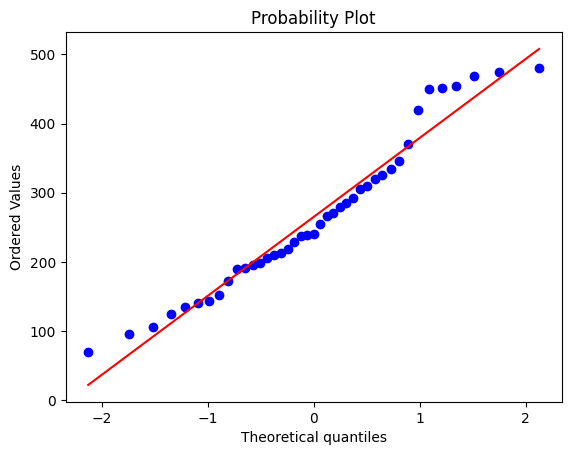

In [33]:
probplot(A, plot=plt)
shapiro(A)

ShapiroResult(statistic=0.9605217576026917, pvalue=0.16404283046722412)

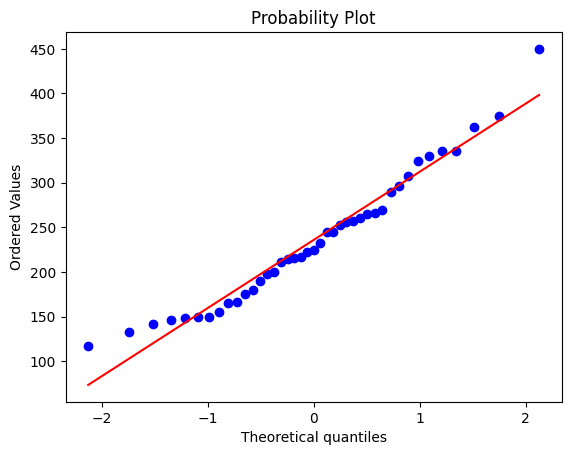

In [34]:
probplot(B, plot=plt)
shapiro(B)

#### **2. Можно ли считать выборки нормальными?**

**Ваш ответ (да/нет и почему)**


В обоих случаях p-значения выше общепринятого порога в 0.05. Это означает, что нет оснований отвергнуть нулевую гипотезу о нормальности распределения данных в каждой из выборок.

Итого ответ: **да**

#### **3. Формализация задачи**

Пусть $\mu_X$ -- средняя стоимость продажи в 2021, $\mu_Y$ -- средняя стоимость продажи в 2022. Тогда

- $H_0$ : $\mu_X$ = $\mu_Y$

- $H_1$ : $\mu_X$ < $\mu_Y$

- $\alpha = 0.05$

#### **4. Численное решение**

In [35]:
from scipy.stats import mannwhitneyu

In [36]:
alpha = 0.05

In [37]:
t_test = ttest_ind(x1=A, x2=B, usevar='unequal')

print(f'[T_TEST] stat=\'{t_test[0]:.4f}\', p_value=\'{t_test[1]:.4f}\', df=\'{t_test[2]}\'')
print(f'[T_TEST] p_value < alpha : {t_test[1] < alpha}')

[T_TEST] stat='1.3683', p_value='0.1756', df='69.79041099207062'
[T_TEST] p_value < alpha : False


Получилось ли отклонить гипотезу?

- Да  --> можно остановиться и выдохнуть
- **Нет** --> нужно попробовать что-то ещё

Так как p-значение (0.1756) больше альфа (0.05), мы не можем отвергнуть нулевую гипотезу о том, что различия между средними в группах статистически не значимы. Это означает, что по результатам t-теста у нас нет достаточных оснований считать, что новый год (2022) улучшил показатель стоимости. Новый сделки не показали эффективности в увеличении стоимости продаж, основываясь на результатах t-теста.

In [38]:
MWW_test = mannwhitneyu(A, B)

print(f'[MWW_TEST] stat=\'{MWW_test[0]:.4f}\', p_value=\'{MWW_test[1]:.4f}\'')
print(f'[MWW_TEST] p_value < alpha : {MWW_test[1] < alpha}')

[MWW_TEST] stat='945.0000', p_value='0.3348'
[MWW_TEST] p_value < alpha : False


Получилось ли отклонить гипотезу?

- Да  --> можно остановиться и выдохнуть
- Нет --> провели два теста, предлагаю остановиться и выдохнуть

#### **6. Выводы**

Получилось ли отклонить гипотезу?
- нет

Какой вывод можем сделать?
- Новый год продаж не показал увеличения стоимости сделок, статистически значимый во всяком случае

### [2.5 балла] Задача 4
---

Производитель Несквика хочет проверить, что машина по упаковке сухого завтрака работает корректно. Она настроена насыпать в каждую коробку по 460 граммов хлопьев. В качестве контрольной выборки взяли 15 коробок с хлопьями и измерили их. Верно ли, что машина работает корректно?

Набор данных -- измерения весов 15-ти коробок из контрольной выборки в граммах

In [39]:
data_list = [
    454.4, 470.8, 447.5, 453.2, 462.6, 445.0, 455.9, 458.2, 461.6, 457.3, 452.0, 464.3, 459.2, 453.5, 465.8
]

### Решение
---

#### **1. Обзор данных**

In [40]:
data = np.array(data_list)

print(f'[STATS] data: size=\'{data.shape[0]}\', mean=\'{data.mean():.4f}\', std=\'{data.std():.4f}\'')

[STATS] data: size='15', mean='457.4200', std='6.6899'


#### **2. Можно ли считать выборку нормальной?**

ShapiroResult(statistic=0.9908426403999329, pvalue=0.9996851682662964)

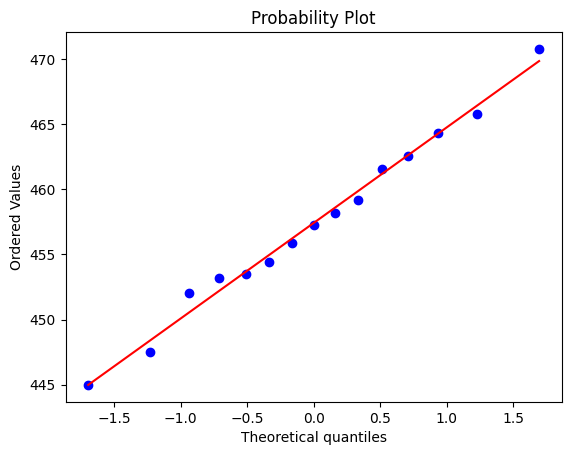

In [41]:
probplot(data, plot=plt)
shapiro(data)

**Ваш ответ (да/нет и почему)**

p-значения выше общепринятого порога в 0.05. Это означает, что нет оснований отвергнуть нулевую гипотезу о нормальности распределения данных.

Итого ответ: да

#### **3. Формализация задачи**

Пусть $\mu_0$ -- средняя ожидаемая граммовка 460, $\mu_1$ -- средняя действительная для выборки граммовка. Тогда

- $H_0$ : $\mu_0$ < $\mu_1$

- $H_1$ : $\mu_0$ = $\mu_1$

- $\alpha = 0.05$

#### **4. Численное решение**

In [42]:
from scipy.stats import ttest_1samp
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import wilcoxon

In [43]:
alpha = 0.05
mu0 = 460

In [45]:
t_test = ttest_1samp(data, mu0)

print(f'[T_TEST] stat=\'{t_test[0]:.4f}\', p_value=\'{t_test[1]:.4f}\'')
print(f'[T_TEST] p_value < alpha : {t_test[1] < alpha}')

[T_TEST] stat='-1.4430', p_value='0.1710'
[T_TEST] p_value < alpha : False


Получилось ли отклонить гипотезу?

- Да  --> можно остановиться и выдохнуть
- **Нет** --> нужно попробовать что-то ещё

In [46]:
s_test = sign_test(data, mu0)

print(f'[SIGN_TEST] stat=\'{s_test[0]:.4f}\', p_value=\'{s_test[1]:.4f}\'')
print(f'[SIGN_TEST] p_value < alpha : {s_test[1] < alpha}')

[SIGN_TEST] stat='-2.5000', p_value='0.3018'
[SIGN_TEST] p_value < alpha : False


Получилось ли отклонить гипотезу?

- Да  --> можно остановиться и выдохнуть
- **Нет** --> нужно попробовать что-то ещё

In [47]:
wilcoxon_test = wilcoxon(data)

print(f'[Wilcoxon_TEST] stat=\'{wilcoxon_test[0]:.4f}\', p_value=\'{wilcoxon_test[1]:.4f}\'')
print(f'[wilcoxon_TEST] p_value < alpha : {wilcoxon_test[1] < alpha}')

[Wilcoxon_TEST] stat='0.0000', p_value='0.0001'
[wilcoxon_TEST] p_value < alpha : True


Получилось ли отклонить гипотезу?

- **Да**  --> можно остановиться и выдохнуть
- Нет --> провели три теста, предлагаю остановиться и выдохнуть

#### **6. Выводы**

На основании тестов не сразу, но удалось отклонить гипотезу о том, что действительная норма граммовки меньше чем ожидаемая

P.S. Спасибо, что дочитатали до конца... С Вами было круто!